# (Analysis of Ford GoBike System Data )
## by (Abrar EL-Mogy)

## Investigation Overview

> We are interested to know When are the most trips taken? Also what effects the duration of the trips?

## Dataset Overview

> **Ford GoBike** dataset includes information about individual rides during February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')
data = df.drop(["start_station_id", "end_station_id","start_station_longitude", 
                  "start_station_latitude", "end_station_latitude",
                  "end_station_longitude", "bike_share_for_all_trip",
                   "start_station_name","end_station_name", "bike_id", "end_time"], axis=1)
data['duration_min'] = data.duration_sec // 60
data = data.drop(["duration_sec"], axis=1)
data['start_time'] = pd.to_datetime(data['start_time'])
data['start_day'] = data['start_time'].dt.strftime("%A")
data['start_hour'] = data['start_time'].dt.hour
data = data.drop(["start_time"], axis=1)
data.head()
data.dropna(inplace=True)
data['age'] =  pd.to_datetime('today').year - data.member_birth_year
data = data.query("age <=100")
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Let's see an overview about our data!

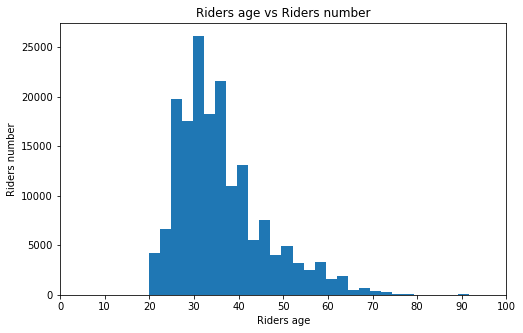

In [10]:
base_color = sb.color_palette()[0]
data = data.query("age <=100")
plt.figure(figsize=[8, 5])
plt.hist(data=data, x='age', bins=30);
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xlabel('Riders age');
plt.ylabel('Riders number');
plt.title('Riders age vs Riders number');

> Here, we can find that the age of majority of the riders is 30 years.

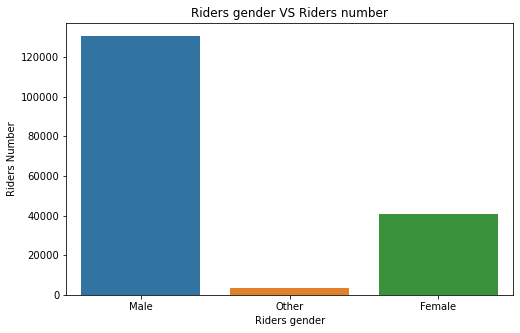

In [11]:
plt.figure(figsize=[8, 5]);
sb.countplot(data=data, x='member_gender');
plt.title('Riders gender VS Riders number');
plt.xlabel('Riders gender');
plt.ylabel('Riders Number');


> Here, we can see that the majority of the riders are males.

## (Visualization 2)

> Let's see what affects our rides duration!

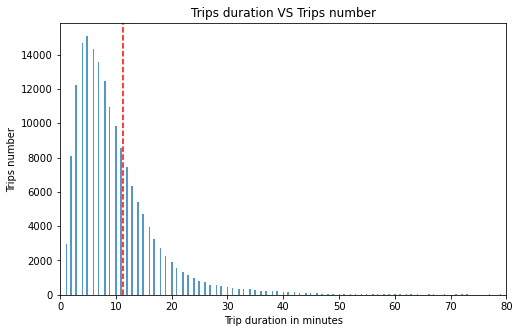

In [12]:
plt.figure(figsize=[8, 5])
sb.histplot(data=data, x="duration_min")
plt.axvline(data.duration_min.mean(), linestyle = '--', color='r')
plt.xlim((0,80));
plt.ylabel('Trips number')
plt.xlabel('Trip duration in minutes');
plt.title('Trips duration VS Trips number');

> Here, we can see that the average of the trips is around 10 mins but the strange is that there are some trips between 20 and 80 mins which is a very long duration.

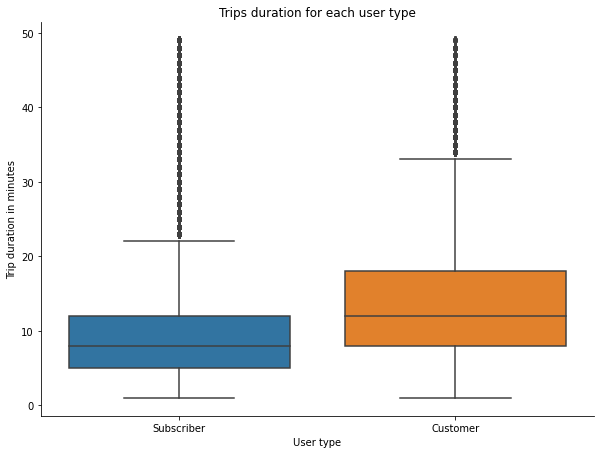

In [15]:
sb.catplot(x="user_type", y="duration_min", kind="box", data=data.query('duration_min < 50'),height=6, aspect=11/8);
plt.ylabel('Trip duration in minutes');
plt.xlabel('User type');
plt.title('Trips duration for each user type');

> Subscribers using bikes for short trips compared with the customers.

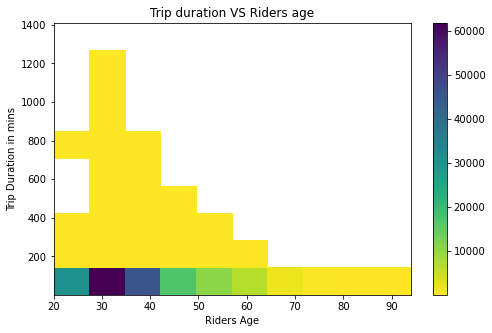

In [17]:
plt.figure(figsize=[8, 5]);
plt.hist2d(data=data, x='age', y='duration_min', cmin=5, cmap='viridis_r');
plt.xlabel('Riders Age')
plt.ylabel('Trip Duration in mins')
plt.title('Trip duration VS Riders age')
plt.colorbar();

> Here, we can say that the riders with age between 20 and 40 years have the longest rides, which is expected.

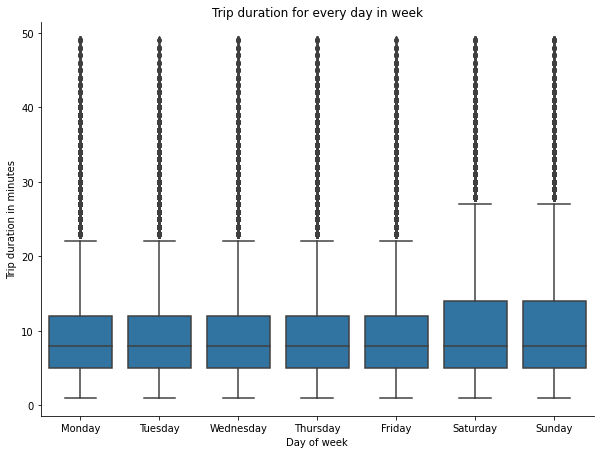

In [18]:
sb.catplot(data=data.query('duration_min < 50'), x="start_day", y="duration_min", order = day_order, kind="box", height=6, aspect=11/8, color=base_color);
plt.xlabel('Day of week');
plt.ylabel('Trip duration in minutes');
plt.title('Trip duration for every day in week');

> Here, we can see that Weekends **[Sunday and Saturday]** have the longest trip.

### Let's summrize our findings regarding the trip duration:
**The duration of the trip depends on:**
<ol><li>The age, the younger the age, the longer the trip.</li>
<li>The day of week, the longest trip took part in weekends.</li>
<li>The user type, subscribers are using bikes for short trips compared with the customers.</li></ol>


## (Visualization 3)
>Let's see When are the most trips taken!

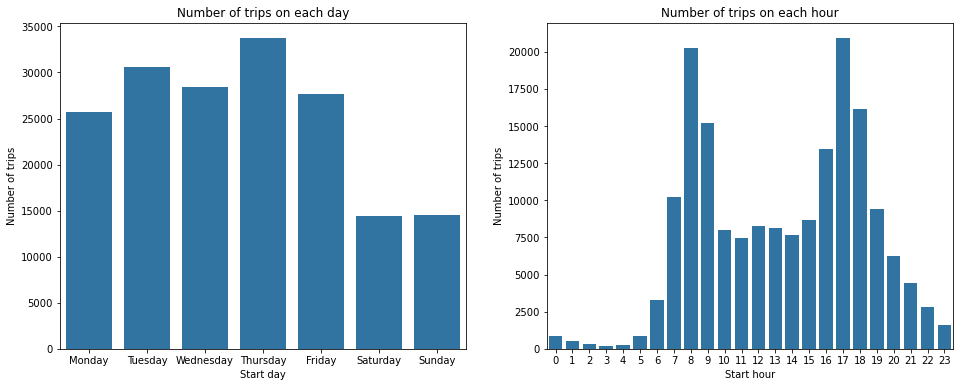

In [19]:
fig, (ax1, ax2)  = plt.subplots(1,2 ,figsize = [16,6])
sb.countplot(data=data, x='start_day', order=day_order, color=base_color ,ax=ax1);
ax1.set_xlabel('Start day');
ax1.set_ylabel('Number of trips');
ax1.set_title('Number of trips on each day');
sb.countplot(data=data, x='start_hour', color=base_color, ax=ax2);
ax2.set_xlabel('Start hour');
ax2.set_ylabel('Number of trips');
ax2.set_title('Number of trips on each hour');

> We can see that **Saturday** and **Sunday** are the least busy days which is logical as these days are considers as vacation days.

> Also we can find that the busiest hours are **8 am** and **5 pm**, as these hours considers as working hours/rush hours.

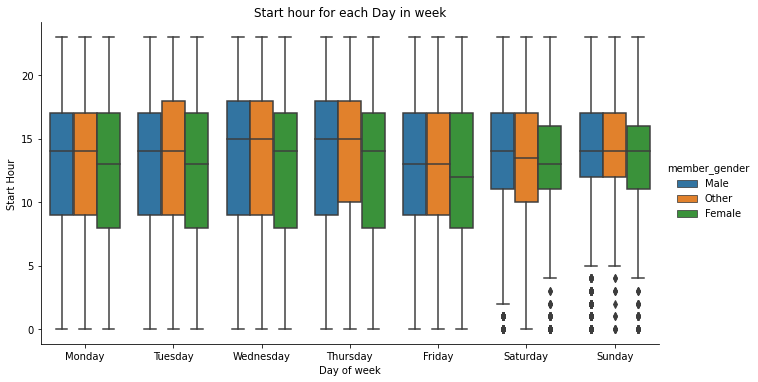

In [20]:
sb.catplot(x="start_day", y="start_hour", hue="member_gender",order=day_order, kind="box", data=data, height=5, aspect=11/6);
plt.xlabel("Day of week");
plt.ylabel("Start Hour");
plt.title("Start hour for each Day in week");

> Here, we can see that on weekends the trips start late compared to weekdays and females are starting slightly early than the males.

### Let's Summrize When the most trips are taken!
**Trips time depends on:**
<ol><li>Starting hours slightly depend on member gender, as females are starting slightly early than the males and the busiest hours are **8 am** and **5 pm**</li>
<li>The day of week, Saturday and Sunday are the least busy.</li></ol>

## Analysis Summary:
    
 > We can say that subscribers from males and females are using this service as work transportaion, as the duration of the trips are short and the most taken trips are in weedays not weekends, and on weekends the trips starts late, also the most using hours are 8 am and 5pm which considered as working hours.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [22]:
!jupyter nbconvert fordbike_slide_deck.ipynb --to slides --no-input

[NbConvertApp] Converting notebook fordbike_slide_deck.ipynb to slides
[NbConvertApp] Writing 720842 bytes to fordbike_slide_deck.slides.html
